In [21]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid", palette="coolwarm_r")


In [22]:
#Loading Data
df= pd.read_csv('sales.csv')

## Understanding Data

In [23]:
# preview of the first 10 Rows
df.head(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,1,Call,17ca2073-db8a-4b9f-83e6-278e5d21c37b,9,42.70,24,28,Pennsylvania
1,1,Call,c296c787-c70e-40b1-9bf2-151248b71986,8,40.05,4,17,Alabama
2,1,Email + Call,375a57db-00c9-4fea-aba0-557fbf99af24,9,NaN,5,21,Texas
3,1,Email,5b372650-a860-46c9-bab4-4835da5b08f5,9,86.80,9,20,Pennsylvania
4,1,Email + Call,53d4d2ef-d9c1-45d7-9f13-dc49e1ae8b07,13,190.37,0,32,Alabama
5,1,Email,fdd40530-41ad-4c8a-8688-e5bfc57bb846,11,107.67,6,26,New Jersey
6,1,Email,1862ccaf-fe2d-444c-8a03-bb47bcbf4056,10,99.28,1,19,Wyoming
7,1,Email,3487f16d-00f3-4058-bfdd-6fd6fcb31648,11,108.92,1,28,Iowa
8,1,Email + Call,43e409a8-419d-4c58-bce0-821107372060,9,132.68,15,26,Kentucky
9,1,Email,1bdf7e51-1308-4447-827d-811569748c2a,11,105.44,6,27,Connecticut


In [24]:
#Shape of the Dataset
print(f"The Dimension of our Dataset is {df.shape}")

The Dimension of our Dataset is (15000, 8)


In [25]:
#Columns in the Dataset
df.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

In [26]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


The Data has 1500 entries, each row representing a customer and 8 columns represennting the features or attributes describing each customer.
The following are the features:-
- `week` → Week sale was made,counted as weeks since product launch
- `sales_method` → Character, which of the three sales methods were used for that customer
- `customer_id` → Character, unique identifier for the customer
- `nb_sold` → Numeric, number of new products sold
- `revenue` → Numeric, revenue from the sales, rounded to 2 decimal places.
- `years_as_customer` → Numeric, number of years customer has been buying from us
(company founded in 1984)
- `nb_site_visits` → Numeric, number of times the customer has visited our website in the last 6 months
- `state` → Character, location of the customer i.e. where orders are
 shipped



## Data Cleaning

In [27]:
#Checking for duplicates
print(f"Number of duplicates in the Dataset: {df.duplicated().sum()}")

Number of duplicates in the Dataset: 0


In [28]:
#Checking for missing values
print(f"Number of missing values per column: ")
df.isna().sum()

Number of missing values per column: 


week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

**Handling missing values**

To handle the missing values in the `revenue` column we will replace the missing values  with `0` to indicate that the sales made by that customer did not generate any revenue

In [29]:
# Replacing missing values
df['revenue'] = df['revenue'].fillna(0.00)
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

**Inspecting Data types**

Ensuring that categorical variables have the `Category` data type and converting relevant data types where necessary.

In [30]:
# Inspecting Data Types
df.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [31]:
df[['week', 'sales_method', 'state']] =df[['week', 'sales_method', 'state']].astype('category')

# Ensuring revenue is rounded to two decimal places
# df['revenue'] = round(df['revenue'], 2)
df.dtypes

week                 category
sales_method         category
customer_id            object
nb_sold                 int64
revenue               float64
years_as_customer       int64
nb_site_visits          int64
state                category
dtype: object

In [32]:
#Ensuring the customer_id column contains only unique values
df['customer_id'].nunique()

15000

In [33]:
#Looking for anomalies in the sales_method column to ensure we have unique categories:- 'Call', 'Email', 'Email + call'
categories = {'em + call':'Email + Call'}
df['sales_method']= df['sales_method'].replace(categories).str.title()
df['sales_method'].unique()



array(['Call', 'Email + Call', 'Email'], dtype=object)

In [34]:
#Lets do the same for the state column
df['state']= df['state'].str.title()
df['state'].unique()

array(['Pennsylvania', 'Alabama', 'Texas', 'New Jersey', 'Wyoming',
       'Iowa', 'Kentucky', 'Connecticut', 'Arizona', 'California',
       'Virginia', 'New York', 'Arkansas', 'Ohio', 'Michigan',
       'Minnesota', 'Florida', 'Illinois', 'Missouri', 'Kansas',
       'Georgia', 'Indiana', 'Oklahoma', 'Louisiana', 'West Virginia',
       'Colorado', 'Wisconsin', 'South Carolina', 'North Carolina',
       'Nevada', 'Nebraska', 'New Mexico', 'Washington', 'Oregon',
       'North Dakota', 'Tennessee', 'Mississippi', 'Massachusetts',
       'Maryland', 'New Hampshire', 'South Dakota', 'Utah', 'Maine',
       'Hawaii', 'Rhode Island', 'Alaska', 'Vermont', 'Delaware', 'Idaho',
       'Montana'], dtype=object)

In [35]:
#saving the cleaned data
# df.to_csv('Cleaned_Sales.csv')

## Demographics

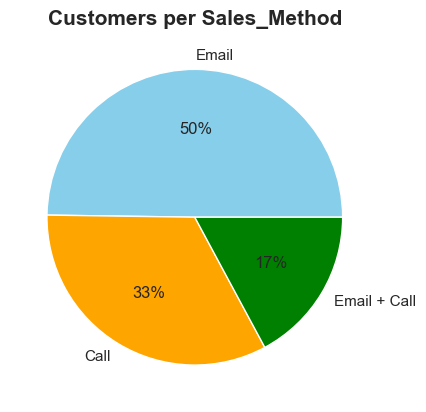

In [36]:
# How many customers were there for each approach?
sizes = df['sales_method'].value_counts(normalize= True)
labels = sizes.index
plt.pie(sizes, labels= labels, autopct= '%1.0f%%', colors=['skyblue', 'orange', 'green'])
plt.title('Customers per Sales_Method', fontweight = 'bold', fontsize = 15)
plt.show()

 **Observation**
 
The `Email` sales method is the most common, accounting for __50%__ of total customers. The `Call` method follows with **33%**, indicating it is also a significant approach but less than Email.The `Email + Call` combination is the least used, making up only __17%__ of the total customers. 

This suggests that Email is the dominant sales method, while the combination of Email + Call is the least preferred or least effective among customers. 

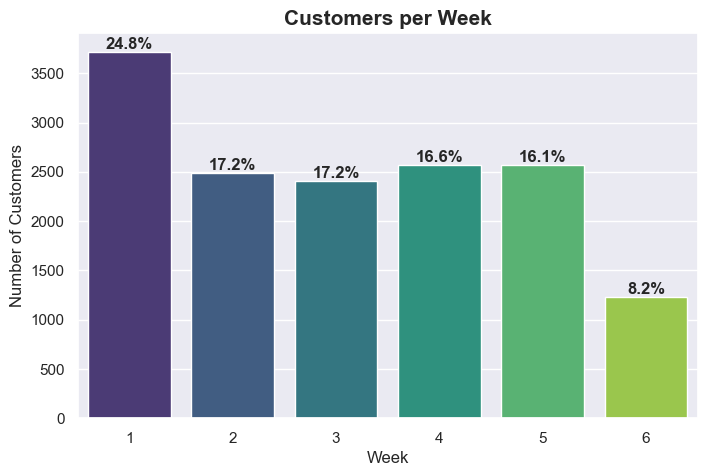

In [37]:
#Which week had the most customers?
week_counts = df['week'].value_counts()  
percentages = (week_counts / week_counts.sum()) * 100 

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='week', data=df, palette="viridis")
# Add percentage labels
for a, week in zip(ax.patches, week_counts.index): 
    ax.text(a.get_x() + a.get_width()/2, a.get_height(),  
            f'{percentages[week]:.1f}%',  
            ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.title('Customers per Week', fontweight='bold', fontsize=15)
plt.xlabel("Week")
plt.ylabel("Number of Customers")
plt.show()


**Observation**

The bar chart displays the percentage distribution of customers across different weeks. Week 1 had the highest number of customers, accounting for 24.8% of the total, significantly leading compared to other weeks. Weeks 2 and 3 had equal customer proportions at 17.2% each, indicating a steady flow of customers. Week 4 followed closely with 16.6%, while Week 5 had a slightly lower share at 16.1%. Week 6 had the least number of customers at just 8.2%, showing a notable decline. 

Overall, the chart suggests that customer activity peaked at the beginning and gradually declined towards Week 6.

Text(0, 0.5, 'State')

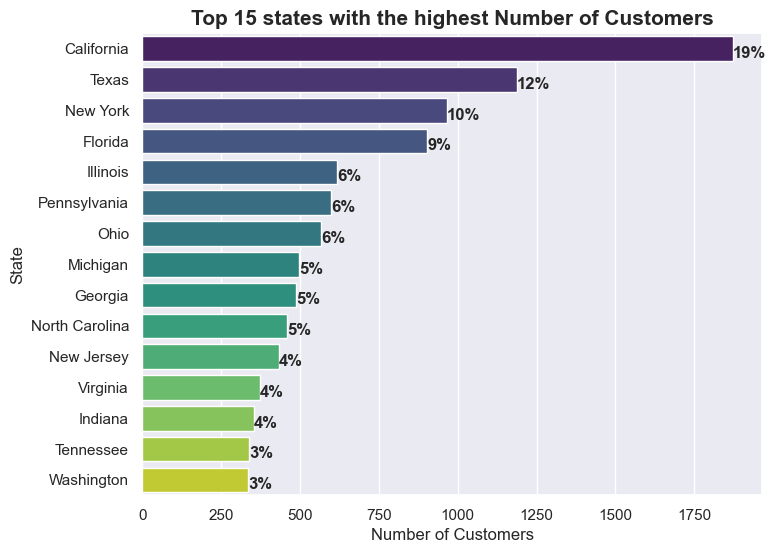

In [38]:
# From which state were most customers from?
count = df['state'].value_counts().sort_values(ascending= False).head(15)
state_count = (count/ count.sum())*100
plt.figure(figsize =(8,6))
ax= sns.countplot(y= 'state', data= df, order = count.index, palette= 'viridis')
for a, state in zip(ax.patches, count.index):
    ax.text(a.get_width(), a.get_y() + a.get_height(), f'{state_count[state]:.0f}%', ha= 'left', va= 'bottom', 
            fontweight= 'bold', fontsize= 12)

plt.title('Top 15 states with the highest Number of Customers', fontweight = 'bold', fontsize =15)
plt.xlabel('Number of Customers')
plt.ylabel('State')


#check how to display top 10 states, and order

**Observation**

The chart shows that California has the highest number of customers at 19%, significantly leading other states. Texas, New York, and Florida also have a considerable share of customers, while the remaining states have a more evenly distributed but smaller customer base. The trend suggests that customer concentration is higher in a few key states, with a gradual decline across the rest. 

The distribution suggests that the majority of customers are concentrated in a few key states, with California having a notable dominance over the rest. The presence of several states with smaller percentages indicates a wider but less concentrated customer base across the country.

In [39]:
#